## Якиманский А В - CVML 1

In [1]:
!uv pip install opencv-python

Resolved 2 packages in 303ms                                         
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)-------     0 B/60.07 MiB                  
⠙ Preparing packages... (0/1)------- 16.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 32.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 48.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 64.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 80.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 96.00 KiB/60.07 MiB                
⠙ Preparing packages... (0/1)------- 112.00 KiB/60.07 MiB               
⠙ Preparing packages... (0/1)------- 128.00 KiB/60.07 MiB               
⠙ Preparing packages... (0/1)------- 144.00 KiB/60.07 MiB               
⠙ Preparing packages... (0/1)------- 160.00 KiB/60.07 MiB               
⠙ Preparing packages... (0/1)------- 176.00 Ki

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = np.loadtxt('./data/dr-train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/dr-test.csv', delimiter=',', skiprows=1)

In [6]:
train_label = train[:, 0]
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [7]:
train_img.shape

(42000, 28, 28)

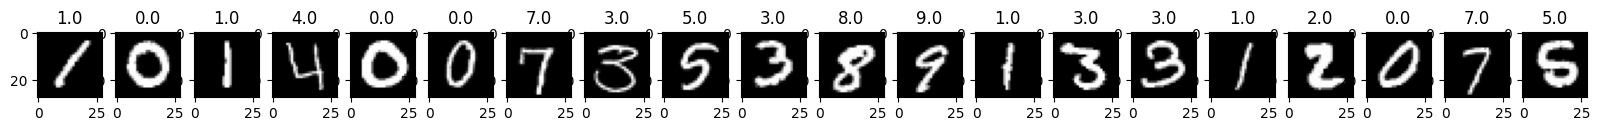

In [8]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:20], 1):
    subplot = fig.add_subplot(1, 20, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [10]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [12]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

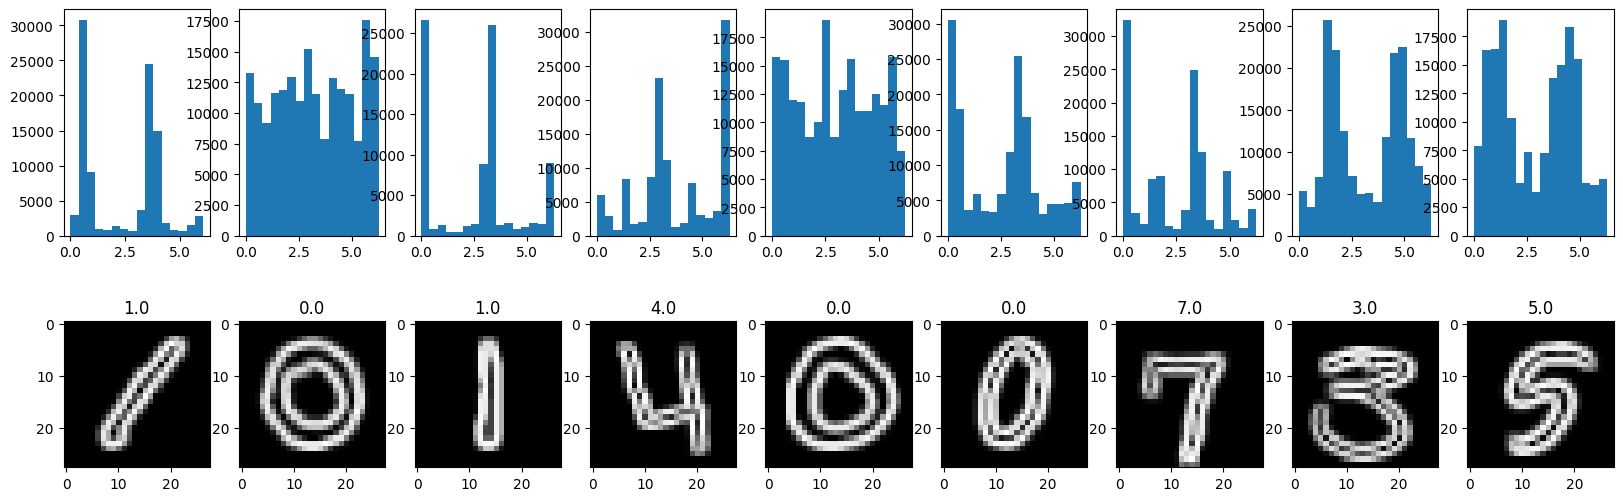

In [13]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:9], 1):
    subplot = fig.add_subplot(1, 9, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 9, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

In [14]:
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [28]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [15]:
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]


In [29]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [17]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=21)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

In [19]:
model.fit(x_train, y_train)

ExtraTreesClassifier()

In [20]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(x_val)

print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.656547619047619


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.43      0.40      0.41       814
         1.0       0.98      0.96      0.97       893
         2.0       0.54      0.49      0.51       796
         3.0       0.61      0.73      0.66       828
         4.0       0.71      0.74      0.72       829
         5.0       0.69      0.68      0.69       806
         6.0       0.52      0.46      0.49       888
         7.0       0.85      0.79      0.82       886
         8.0       0.54      0.59      0.56       803
         9.0       0.66      0.71      0.68       857

    accuracy                           0.66      8400
   macro avg       0.65      0.65      0.65      8400
weighted avg       0.66      0.66      0.66      8400



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[326   6  63  29  26  23 130   8 165  38]
 [  0 856   4   0  19   0   3   5   0   6]
 [ 43   0 389 132   3  88  44  24  48  25]
 [ 18   0  61 602   1  74  10   5  46  11]
 [ 17   7   6   6 611   2  59  36   4  81]
 [ 12   0  71 121   0 545  10   6  37   4]
 [167   1  50  17  88  11 408   8  72  66]
 [ 12   5  16   5  53   8  30 700   7  50]
 [111   0  38  69   3  28  46   3 472  33]
 [ 54   0  21  13  57   6  45  28  27 606]]


In [23]:
centroids = np.zeros((10, train_hist.shape[1]), dtype=np.float32)

In [24]:
for i in range(10):
    centroids[i] = np.mean(x_train[y_train == i], axis=0)

In [30]:
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
    distances = np.linalg.norm(centroids - test_hist[i], axis=1)
    pred_test[i] = np.argmin(distances)

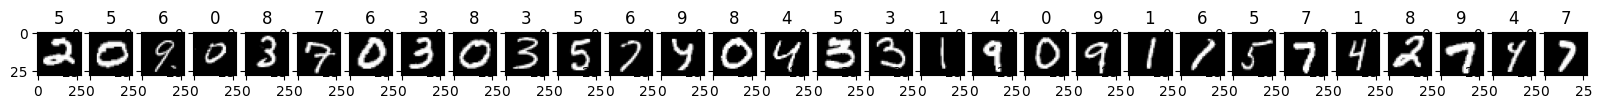

In [31]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:30], 1):
    subplot = fig.add_subplot(1, 30, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

In [32]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))